### Group Prject - London Bike Rentals

In this project, you will work with the London Bikes dataset, which records daily bike rentals in the city along with key variables such as dates, weather conditions, and seasonality.

The goal is to apply the full data analytics workflow:

- Clean and prepare the dataset.

- Explore the data through visualisation.

- Construct and interpret confidence intervals.

- Build a regression model to explain variation in bike rentals.

- By the end, you will connect statistical concepts with practical Python analysis.

In [24]:
## Import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

bikes = pd.read_csv('../../Data/london_bikes.csv')

In [25]:
bikes

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend
0,2010-07-30T00:00:00Z,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,NaN,31.0,17.7,12.3,25.1,False
1,2010-07-31T00:00:00Z,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,NaN,47.0,21.1,17.0,23.9,True
2,2010-08-01T00:00:00Z,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,NaN,3.0,19.3,14.6,23.4,True
3,2010-08-02T00:00:00Z,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,NaN,20.0,19.5,15.6,23.6,False
4,2010-08-03T00:00:00Z,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,NaN,39.0,17.9,12.1,20.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27T00:00:00Z,16959,2024,Sat,Jan,4,4.0,NaN,10331.0,39.0,0.0,0.0,21.0,4.5,NaN,12.2,True
4930,2024-01-28T00:00:00Z,15540,2024,Sun,Jan,4,3.0,NaN,10230.0,63.0,0.0,0.0,59.0,6.6,NaN,12.5,True
4931,2024-01-29T00:00:00Z,22839,2024,Mon,Jan,5,8.0,NaN,10222.0,18.0,0.0,0.0,0.0,8.8,NaN,8.8,False
4932,2024-01-30T00:00:00Z,22303,2024,Tue,Jan,5,8.0,NaN,10277.0,19.0,0.0,0.0,0.0,8.3,NaN,12.0,False


In [26]:
bikes.shape

(4934, 17)

**1. Data Cleaning**

Check for missing values across columns. How would you handle them?

Inspect the date column and ensure it is correctly formatted as datetime. Extract useful features (year, month, day, day of week, season).

Convert categorical variables (e.g., season, weather) to appropriate categories in Python.

Ensure numeric columns (e.g., bikes rented, temperature) are in the right format.

In [28]:
# Convert numeric columns to appropriate types
numeric_cols = ['duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'bike_id']
for col in numeric_cols:
    bikes[col] = pd.to_numeric(bikes[col], errors='coerce')

KeyError: 'duration'

In [ ]:
## Your code goes here
bikes.isna().any() # check if any column contains missing values

date             False
bikes_hired      False
year             False
wday             False
month            False
week             False
cloud_cover       True
humidity          True
pressure          True
radiation         True
precipitation     True
snow_depth        True
sunshine          True
mean_temp         True
min_temp          True
max_temp          True
weekend          False
dtype: bool

#### To the question: Check for missing values across columns. How would you handle them?

A/ We would fill the missing values with the mean from each numeric column


In [ ]:
df_mean = bikes.mean(numeric_only=True)
bikes_filled = bikes.fillna(df_mean)
bikes_filled.isna().any() # Verificar si quedan valores faltantes después de rellenar con la media

date             False
bikes_hired      False
year             False
wday             False
month            False
week             False
cloud_cover      False
humidity         False
pressure         False
radiation        False
precipitation    False
snow_depth       False
sunshine         False
mean_temp        False
min_temp         False
max_temp         False
weekend          False
dtype: bool

In [ ]:
bikes.dropna() # drop rows with any missing values (default)

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend
88,2010-10-26T00:00:00Z,13950,2010,Tue,Oct,43,8.0,87.0,10234.0,25.0,40.0,0.0,0.0,8.0,1.9,17.6,False
89,2010-10-27T00:00:00Z,19559,2010,Wed,Oct,43,4.0,84.0,10166.0,68.0,2.0,0.0,38.0,13.4,9.1,15.8,False
90,2010-10-28T00:00:00Z,19995,2010,Thu,Oct,43,5.0,84.0,10149.0,35.0,0.0,0.0,5.0,13.0,10.2,14.8,False
91,2010-10-29T00:00:00Z,19119,2010,Fri,Oct,43,6.0,83.0,10004.0,24.0,26.0,0.0,0.0,13.4,11.9,14.6,False
92,2010-10-30T00:00:00Z,13493,2010,Sat,Oct,43,4.0,85.0,9975.0,76.0,24.0,0.0,53.0,11.7,8.7,12.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,2023-12-27T00:00:00Z,6721,2023,Wed,Dec,52,8.0,89.0,10067.0,12.0,46.0,0.0,0.0,8.9,5.5,12.6,False
4899,2023-12-28T00:00:00Z,7956,2023,Thu,Dec,52,7.0,81.0,10051.0,15.0,48.0,0.0,2.0,11.2,9.7,11.9,False
4900,2023-12-29T00:00:00Z,11006,2023,Fri,Dec,52,6.0,78.0,10071.0,20.0,0.0,0.0,7.0,10.6,9.2,12.2,False
4901,2023-12-30T00:00:00Z,8801,2023,Sat,Dec,52,7.0,87.0,10046.0,12.0,56.0,0.0,0.0,8.9,5.6,10.7,True


**2. Exploratory Data Analysis (EDA)**

Plot the distribution of bikes rented.

Explore how rentals vary by season and month.

Investigate the relationship between temperature and bikes rented.

**Deliverables:**

At least 3 clear visualisations with captions.

A short written interpretation of key patterns (seasonality, weather effects, etc.).



In [ ]:
## Your code goes here
# Convert to datetime first
bikes['date'] = pd.to_datetime(bikes['date'])

# extract components
bikes["year"] = bikes["date"].dt.year
bikes["month"] = bikes["date"].dt.month
bikes["month_name"] = bikes["date"].dt.month_name()   # month label
bikes["day"] = bikes["date"].dt.day
bikes["day_of_week"] = bikes["date"].dt.day_name()     # weekday label
bikes['date'] = bikes['date'].dt.date


# create season_name based on numeric rules
bikes["season"] = np.select(
    [
        (bikes["month"].isin([12, 1, 2])),   # Winter: Dec, Jan, Feb
        (bikes["month"].isin([3, 4, 5])),    # Spring: Mar, Apr, May
        (bikes["month"].isin([6, 7, 8])),    # Summer: Jun, Jul, Aug
        (bikes["month"].isin([9, 10, 11]))   # Autumn: Sep, Oct, Nov
    ],
    ["Winter", "Spring", "Summer", "Autumn"], 
    default="Unknown"
)

# convert to ordered categorical, like fct_relevel in R
season_order = ["Winter", "Spring", "Summer", "Autumn"]
bikes["season"] = pd.Categorical(
    bikes["season"],
    categories=season_order,
    ordered=True
)

bikes

bikes

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,...,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend,month_name,day,day_of_week,season
0,2010-07-30,6897,2010,Fri,7,30,6.0,65.0,10147.0,157.0,...,NaN,31.0,17.7,12.3,25.1,False,July,30,Friday,Summer
1,2010-07-31,5564,2010,Sat,7,30,5.0,70.0,10116.0,184.0,...,NaN,47.0,21.1,17.0,23.9,True,July,31,Saturday,Summer
2,2010-08-01,4303,2010,Sun,8,30,7.0,63.0,10132.0,89.0,...,NaN,3.0,19.3,14.6,23.4,True,August,1,Sunday,Summer
3,2010-08-02,6642,2010,Mon,8,31,7.0,59.0,10168.0,134.0,...,NaN,20.0,19.5,15.6,23.6,False,August,2,Monday,Summer
4,2010-08-03,7966,2010,Tue,8,31,5.0,66.0,10157.0,169.0,...,NaN,39.0,17.9,12.1,20.1,False,August,3,Tuesday,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27,16959,2024,Sat,1,4,4.0,NaN,10331.0,39.0,...,0.0,21.0,4.5,NaN,12.2,True,January,27,Saturday,Winter
4930,2024-01-28,15540,2024,Sun,1,4,3.0,NaN,10230.0,63.0,...,0.0,59.0,6.6,NaN,12.5,True,January,28,Sunday,Winter
4931,2024-01-29,22839,2024,Mon,1,5,8.0,NaN,10222.0,18.0,...,0.0,0.0,8.8,NaN,8.8,False,January,29,Monday,Winter
4932,2024-01-30,22303,2024,Tue,1,5,8.0,NaN,10277.0,19.0,...,0.0,0.0,8.3,NaN,12.0,False,January,30,Tuesday,Winter


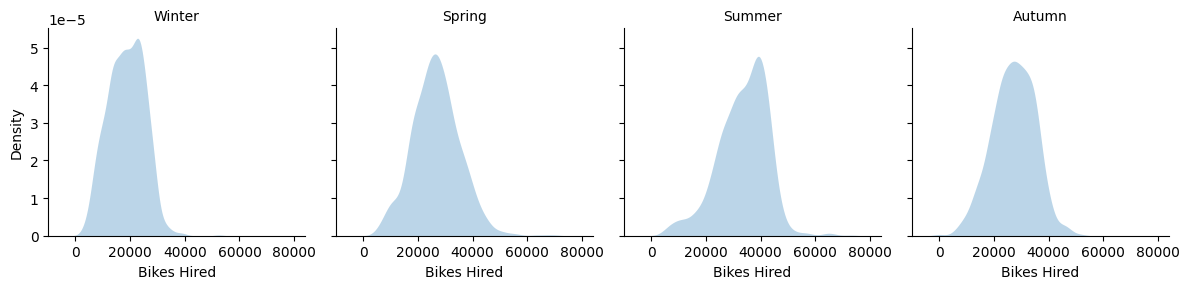

In [ ]:
# Density plots of bikes hired by month and season
g = sns.FacetGrid(bikes, col="season", col_wrap=4, sharex=True, sharey=True)
g.map_dataframe(sns.kdeplot, x="bikes_hired", fill=True, alpha=0.3, linewidth=0)

# add titles and tidy style
g.set_axis_labels("Bikes Hired", "Density")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

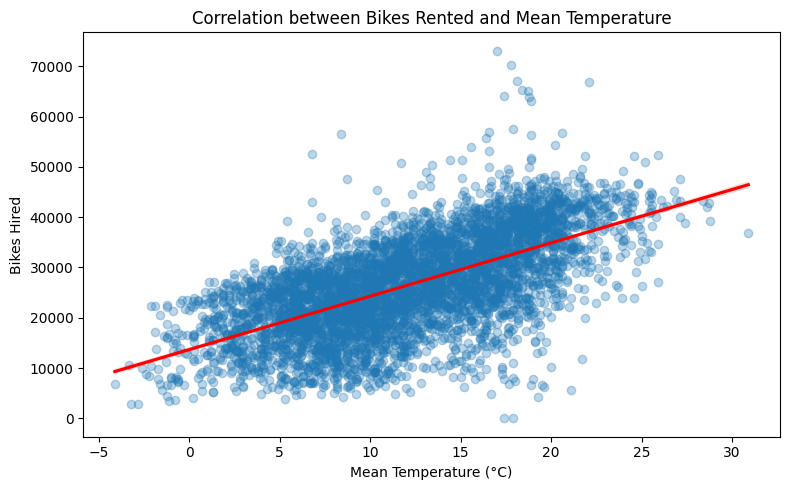

In [ ]:
# Scatter plot with regression line to show correlation between bikes rented and mean temperature
plt.figure(figsize=(8, 5))
sns.regplot(data=bikes, x="mean_temp", y="bikes_hired", scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Bikes Hired")
plt.title("Correlation between Bikes Rented and Mean Temperature")
plt.tight_layout()
plt.show()

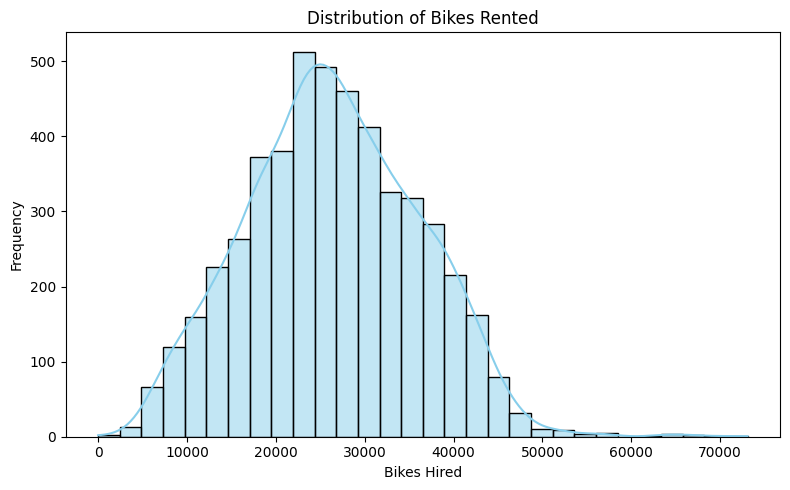

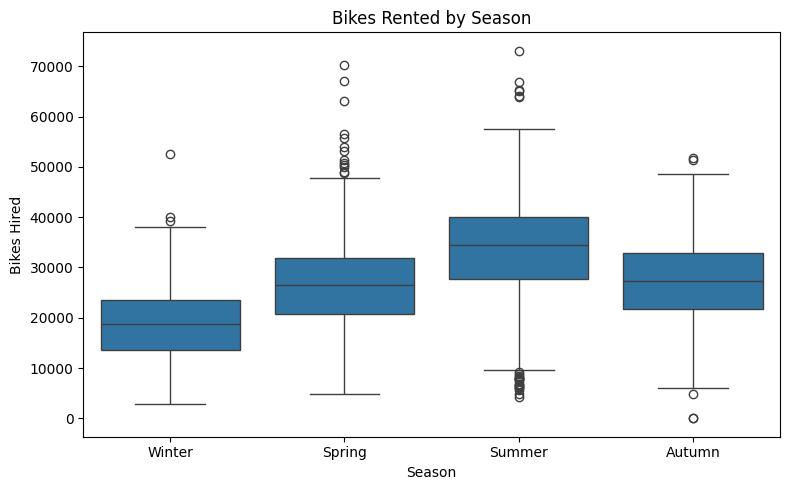

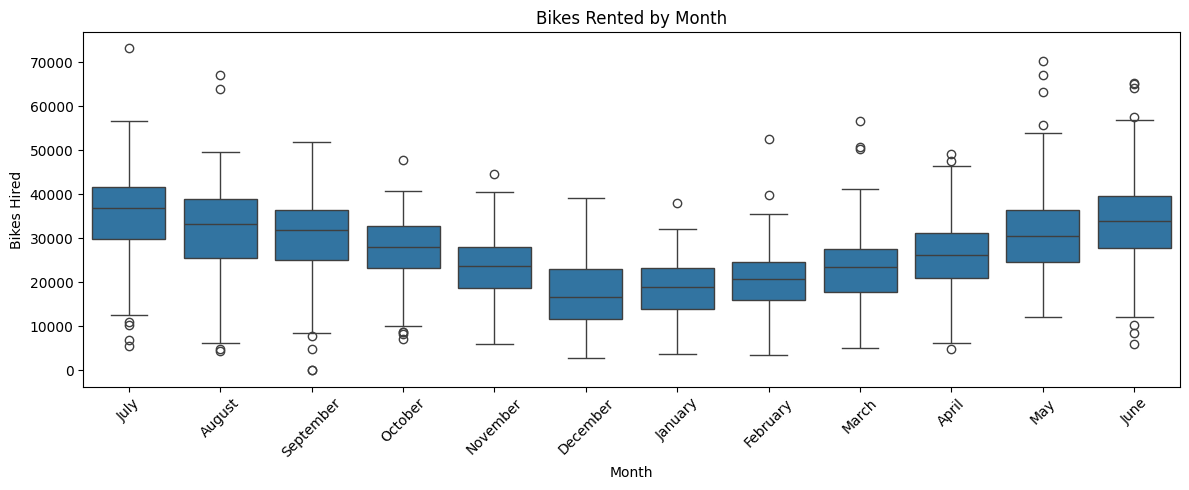

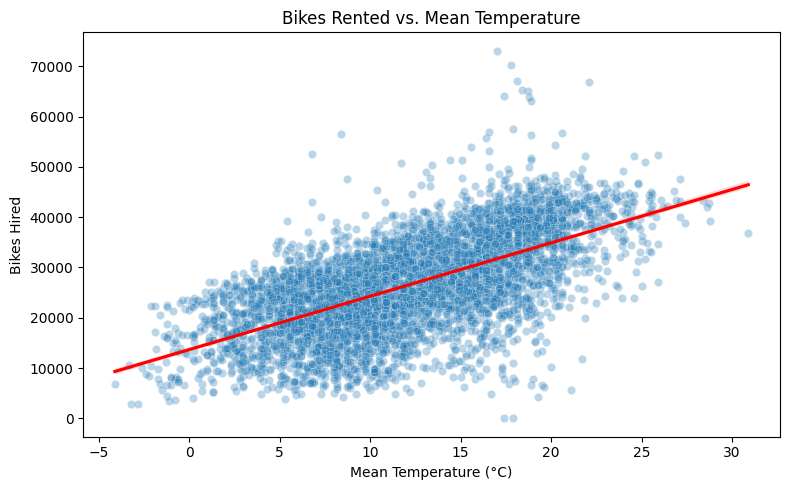

In [ ]:
# Distribution of bikes rented
plt.figure(figsize=(8, 5))
sns.histplot(bikes["bikes_hired"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Bikes Rented")
plt.xlabel("Bikes Hired")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Rentals by season
plt.figure(figsize=(8, 5))
sns.boxplot(data=bikes, x="season", y="bikes_hired", order=["Winter", "Spring", "Summer", "Autumn"])
plt.title("Bikes Rented by Season")
plt.xlabel("Season")
plt.ylabel("Bikes Hired")
plt.tight_layout()
plt.show()

# Rentals by month
plt.figure(figsize=(12, 5))
month_order = bikes["month_name"].drop_duplicates().tolist()
sns.boxplot(data=bikes, x="month_name", y="bikes_hired", order=month_order)
plt.title("Bikes Rented by Month")
plt.xlabel("Month")
plt.ylabel("Bikes Hired")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relationship between temperature and bikes rented
plt.figure(figsize=(8, 5))
sns.scatterplot(data=bikes, x="mean_temp", y="bikes_hired", alpha=0.3)
sns.regplot(data=bikes, x="mean_temp", y="bikes_hired", scatter=False, color='red')
plt.title("Bikes Rented vs. Mean Temperature")
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Bikes Hired")
plt.tight_layout()
plt.show()

In [ ]:
# The graphs show that bike rentals are higher in warmer seasons (Spring and Summer) and months (May to September). There is a positive correlation between mean temperature and the number of bikes rented, indicating that as the temperature increases, bike rentals also tend to increase. The distribution of bikes rented is right-skewed, with most days having lower rentals and a few days with very high rentals.
# Monthly bike rentals are higher in warmer seasons (Spring and Summer) and months (May to September). There is a positive correlation between mean temperature and the number of bikes rented, indicating that as the temperature increases, bike rentals also tend to increase. The distribution of bikes rented is right-skewed, with most days having lower rentals and a few days with very high rentals.
# There are several outliers in the boxplots, especially in the warmer months and seasons, indicating some days with exceptionally high or exceptionally low bike rentals.

**3. Construct 95% confidence intervals for the mean number of bikes rented per season.**

Repeat the calculation per month.

Interpret the result:

What range of values do you expect the true mean to lie in?

Which seasons/months have higher or lower average demand?

Are there overlaps in the intervals, and what does that mean?

**Deliverables:**

A table or plot showing the mean and confidence intervals.

A short interpretation.

In [ ]:
## Your code goes here
#Overall information for all bikes hired
# Take the bikes_hired column (replace with actual column name)
bikes_hired = bikes["bikes_hired"].dropna()  # Remove any missing values from the bikes_hired column

# STEP 1: What you observe (Sample Statistics)
sample_mean = bikes_hired.mean()          # Calculate the sample mean (x̄)
sample_std = bikes_hired.std()            # Calculate the sample standard deviation (s)
n = len(bikes_hired)                      # Get the sample size (n)

# STEP 2: What you believe (Null Hypothesis)
mu_0 = 6000  # null hypothesis: H₀: μ = 7 (population mean equals 7)
          # Alternative hypothesis: H₁: μ ≠ 7 (two-sided test)

# STEP 3: Test statistic (t-statistic)
# Formula: t = (x̄ - μ₀) / (s / √n)
# This measures how many standard errors the sample mean is from the hypothesized mean
t_stat = (sample_mean - mu_0) / (sample_std / (n**0.5)) # n**0.5 means square root of n

# Degrees of freedom for t-distribution
df = n - 1  # df = sample size - 1

# STEP 4: Calculate p-value for two-sided test
# P-value = probability of observing a test statistic as extreme or more extreme
# For two-sided test: P(|T| >= |t_observed|) = 2 × P(T >= |t_observed|)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Display results
print(f"Sample size: {n}")
print(f"Sample mean: {sample_mean:.3f}")
print(f"Test statistic (t): {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation:
# If p_value < 0.05: Reject H₀ (evidence against μ = 7)
# If p_value >= 0.05: Fail to reject H₀ (insufficient evidence against μ = 7)
# test statistic can be negative or positive depending on whether sample mean is less than or greater than mu_0


Sample size: 4934
Sample mean: 26448.566
Test statistic (t): 148.420
P-value: 0.0000


In [ ]:
#Bikes hired by season


Seasonal mean and 95% CI:
level_1  season         lower          mean       n         upper
0        Winter  18240.269277  18610.162753  1235.0  18980.056229
1        Spring  26117.870590  26609.178930  1196.0  27100.487270
2        Summer  32943.520052  33455.454841  1229.0  33967.389631
3        Autumn  26704.967232  27136.845369  1274.0  27568.723506

Monthly mean and 95% CI:
level_1 month_name          mean         lower         upper      n
4          January  18652.470046  18087.101747  19217.838345  434.0
3         February  20370.174387  19700.002421  21040.346353  367.0
7            March  22851.456576  22093.565058  23609.348094  403.0
0            April  26242.038462  25467.957841  27016.119082  390.0
8              May  30722.198511  29883.751777  31560.645245  403.0
6             June  33744.102564  32871.457355  34616.747773  390.0
5             July  35160.679012  34342.928802  35978.429223  405.0
1           August  31604.790323  30677.111754  32532.468891  434.0
11    

/tmp/ipykernel_2584/2322232915.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats_long = bikes.groupby('season')['bikes_hired'].apply(mean_ci).reset_index()


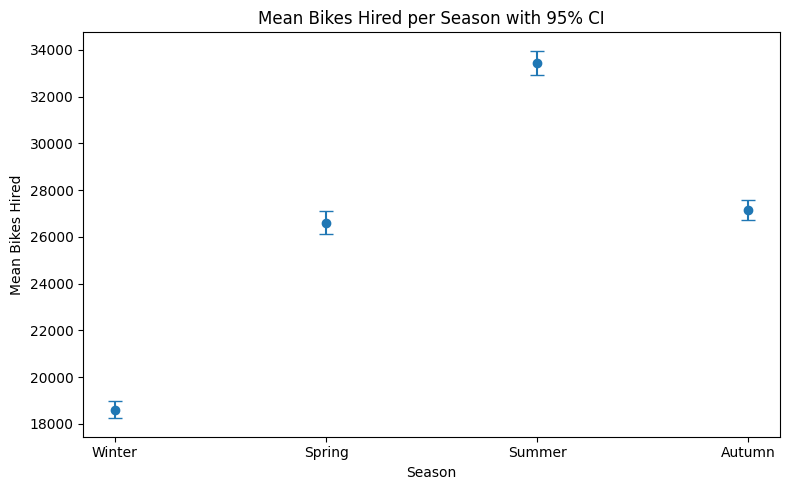

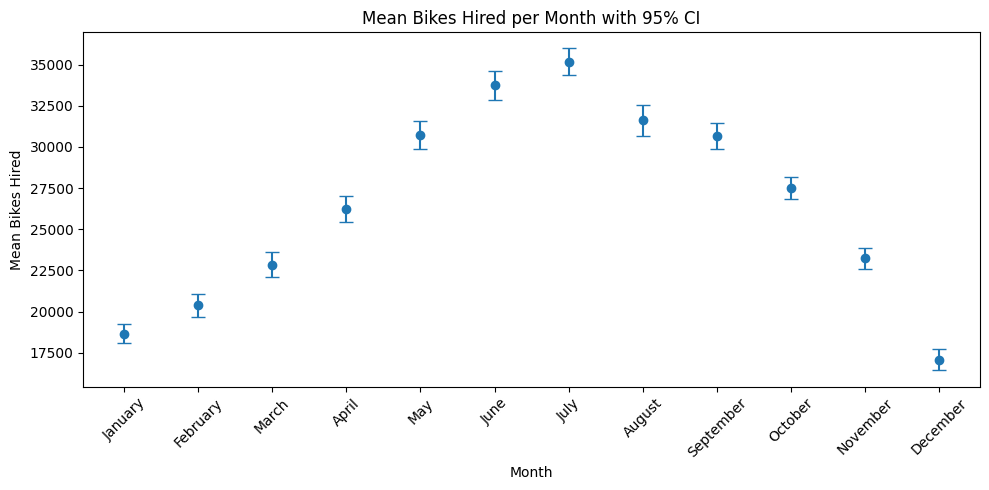

In [ ]:
# 95% confidence intervals for mean bikes rented per season and per month

def mean_ci(series):
    n = series.count()
    mean = series.mean()
    std = series.std()
    se = std / np.sqrt(n)
    ci = stats.t.interval(0.95, n-1, loc=mean, scale=se)
    return pd.Series({'mean': mean, 'lower': ci[0], 'upper': ci[1], 'n': n})

# Per season
season_stats_long = bikes.groupby('season')['bikes_hired'].apply(mean_ci).reset_index()
# Pivot to wide format
season_stats = season_stats_long.pivot(index='season', columns='level_1', values='bikes_hired').reset_index()
print("Seasonal mean and 95% CI:")
print(season_stats)

# Per month
month_stats_long = bikes.groupby('month_name')['bikes_hired'].apply(mean_ci).reset_index()
# Pivot to wide format
month_stats = month_stats_long.pivot(index='month_name', columns='level_1', values='bikes_hired').reset_index()
# To order months correctly
month_stats['month_num'] = pd.to_datetime(month_stats['month_name'], format='%B').dt.month
month_stats = month_stats.sort_values('month_num')

print("\nMonthly mean and 95% CI:")
print(month_stats[['month_name', 'mean', 'lower', 'upper', 'n']])

# Plot: Mean and CI per season
plt.figure(figsize=(8, 5))
plt.errorbar(season_stats['season'], season_stats['mean'], 
             yerr=[season_stats['mean']-season_stats['lower'], season_stats['upper']-season_stats['mean']],
             fmt='o', capsize=5)
plt.title('Mean Bikes Hired per Season with 95% CI')
plt.ylabel('Mean Bikes Hired')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

# Plot: Mean and CI per month
plt.figure(figsize=(10, 5))
plt.errorbar(month_stats['month_name'], month_stats['mean'], 
             yerr=[month_stats['mean']-month_stats['lower'], month_stats['upper']-month_stats['mean']],
             fmt='o', capsize=5)
plt.title('Mean Bikes Hired per Month with 95% CI')
plt.ylabel('Mean Bikes Hired')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Regression Analysis**

What variables influence the number of bikes rented (y) and how? Build a regression model that best explains the variability in bikes rented.

**Interpret:**

Which predictors are significant?

What do the coefficients mean (in practical terms)?

How much of the variation in bike rentals is explained (R²)?

**Deliverables:**

Regression output table.

A short discussion of which factors matter most for predicting bike rentals.

In [ ]:
#Your code goes here


## Deliverables
A knitted HTML, one person per group to submit